In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Limpieza_Calificaciones import data_limpio
from sklearn import linear_model

In [60]:
datos = data_limpio
datos

,Hours Studied,Previous Scores,Performance Index
0,7,99,91.0
1,4,82,65.0
2,8,51,45.0
3,5,52,36.0
4,7,75,66.0
...,...,...,...
9995,1,49,23.0
9996,7,64,58.0
9997,6,83,74.0
9998,9,97,95.0


## Separación de datos de entrenamiento y datos de prueba

In [62]:
x = datos.drop('Performance Index', axis = 1)
y = datos['Performance Index']
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 42)

In [64]:
print(f'Se usarán {X_train.shape} datos sobre vehículos para entrenar el modelo')
print(f'Se usarán {x_test.shape} datos sobre vehículos para probar el modelo' )
print( f'Se usarán {Y_train.shape} datos sobre accidentes para entrenar el modelo' )
print(f'Se usarán {y_test.shape} datos sobre accidentes para probar el modelo')

Se usarán (8000, 2) datos sobre vehículos para entrenar el modelo
Se usarán (2000, 2) datos sobre vehículos para probar el modelo
Se usarán (8000,) datos sobre accidentes para entrenar el modelo
Se usarán (2000,) datos sobre accidentes para probar el modelo


In [42]:
modelo = linear_model.LinearRegression()

In [44]:
modelo.fit(X_train, Y_train)

LinearRegression()

In [46]:
#tabla_param -> Serie con cada variable dependiente con sus respectivos parámetros
print('Coeficientes del modelo: ', modelo.coef_)
print('Intercepción: ', modelo.intercept_)
tabla_param = pd.Series(data = dict(zip(datos.columns.drop('Performance Index'), modelo.coef_)))
tabla_param

Coeficientes del modelo:  [2.85815458 1.01737155]
Intercepción:  -29.67025988675899


Hours Studied      2.858155
Previous Scores    1.017372
dtype: float64

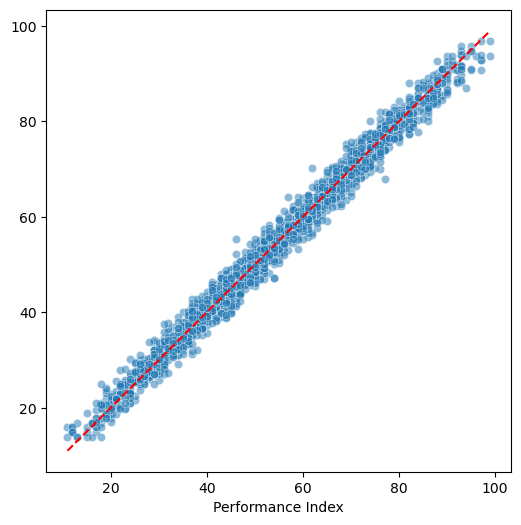

In [48]:
#Análisis del diagrama de dispersión del modelo con respecto a 
predicciones = modelo.predict(x_test)
plt.figure(figsize=(6,6))
sns.scatterplot(x = y_test, y = predicciones, alpha = .5)
limites = [min(y_test.min(), predicciones.min()), max(y_test.max(), predicciones.max())]
plt.plot(limites, limites, 'r', linestyle="--")  # Línea diagonal
plt.show()

In [50]:
from sklearn import metrics
y_prev = modelo.predict(x)
y_real = datos['Performance Index']
print('El coeficiente de determinación es:', metrics.r2_score(y_real, y_prev))
print('El error absoluto máximo', metrics.max_error(y_real, y_prev))
print('El error absoluto medio es', metrics.mean_absolute_error(y_real, y_prev))
print('El error cuadrado medio es: ', metrics.mean_squared_error(y_real, y_prev))

El coeficiente de determinación es: 0.9858678687924026
El error absoluto máximo 9.448601229077788
El error absoluto medio es 1.8184965588139057
El error cuadrado medio es:  5.215964217631807


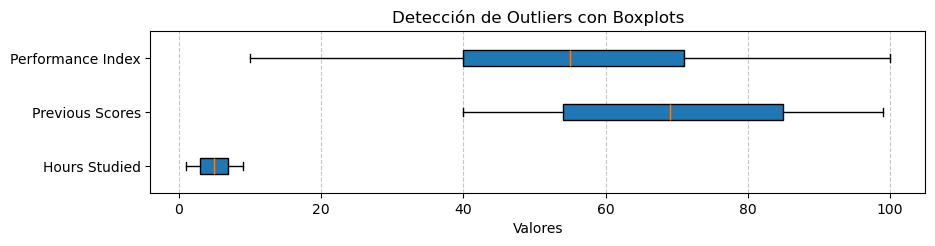

In [52]:
#Verificamos que no haya valores atípicos que puedan sesgar el modelo.
plt.figure(figsize = (10, len(datos.columns)* .7))
plt.boxplot(datos.values, vert=False, patch_artist=True, labels=datos.columns, showfliers = True)  
plt.title("Detección de Outliers con Boxplots")  
plt.xlabel("Valores")  
plt.grid(axis="x", linestyle="--", alpha=0.7)  
plt.show()

In [54]:
var1 = datos['Hours Studied']
var2 = datos['Previous Scores']
variables= pd.DataFrame({'Hours Studied': var1, 'Previous Scores': var2})  

comparativa  = pd.DataFrame({'Hours Studied': var1,
                                    'Previous Scores': var2, 
                                       'Prediction': modelo.predict(variables),
                                       'Real': y,
                                        'Error absoluto': abs(modelo.predict(variables))})
comparativa.head()

,Hours Studied,Previous Scores,Prediction,Real,Error absoluto
0,7,99,91.056605,91.0,91.056605
1,4,82,65.186825,65.0,65.186825
2,8,51,45.080926,45.0,45.080926
3,5,52,37.523833,36.0,37.523833
4,7,75,66.639688,66.0,66.639688


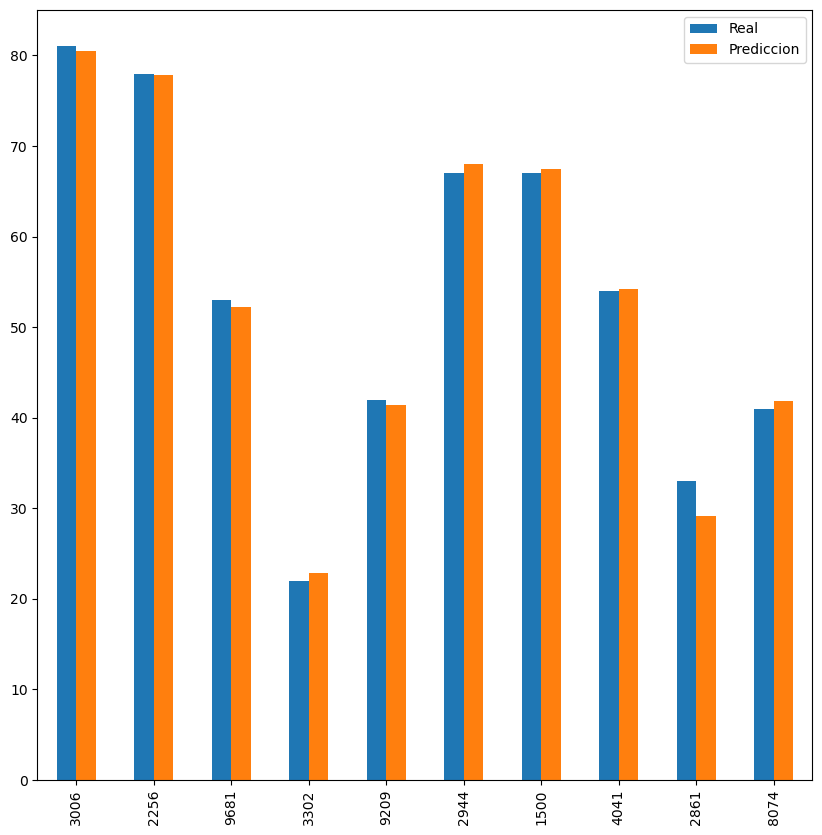

In [56]:
comparativa_prediccion = pd.DataFrame({'Real': comparativa['Real'], 'Prediccion':comparativa['Prediction']})

comparativa_prediccion.sample(10).plot(kind = 'bar')
plt.show()